# A simple Autoencoder network

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
import matplotlib.pyplot as plt
import random

random.seed(42)

### Dataset

- As we know in Autoencoders training means just reconstructing the original image so we don't need labels of fashion MNIST dataset.

In [54]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y1), (x_test, y2) = fashion_mnist.load_data()

# Converting 'uint8' pixel values to 32-bit precision 'float32' values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

## Let's create a simple Autoencoder using fully connected neurons.

In [55]:
latent_vector = 64

class Autoencoder(tf.keras.Model):
      
    def __init__(self, latent_vector):
        self.latent_vector = latent_vector  # latent vector of encoded image
        super().__init__()
        self.Encoder = tf.keras.Sequential([
                    #   Dense(256, activation='relu', input_shape = (28, 28)),
                      Dense(latent_vector, activation='relu', input_shape = (28, 28))
        ])

        self.Decoder = tf.keras.Sequential([
                      Flatten(),
                    #   Dense(256, activation='relu', input_shape=(latent_vector,)),
                      Dense(784, activation='sigmoid'),
                      Reshape((28,28))
        ])

    def call(self, Input):
        encoded_input = self.Encoder(Input)
        output = self.Decoder(encoded_input)
        return output

autoencoder = Autoencoder(latent_vector)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [56]:
train = autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test),
)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0080 - val_loss: 0.0026
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 9.6374e-04 - val_loss: 9.0003e-04
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 8.4205e-04 - val_loss: 8.1832e-04
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 7.5243e-04 - val_loss: 7.2845e-04
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 6.8545e-04 - val_loss: 6.6494e-04
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 6.2488e-04 - val_loss: 6.0148e-04
Epoch 10/10
1875/1875 [=

## Inference

In [58]:
encode = autoencoder.Encoder(x_test).numpy()
decode = autoencoder.Decoder(encode).numpy()

## Results

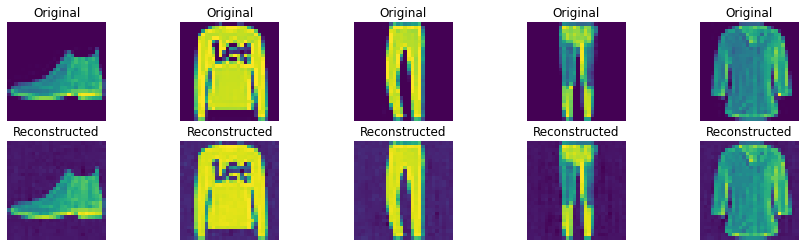

In [59]:
plt.figure(figsize=(15, 4))

# Original Images
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')

# Reconstructed Images
for i in range(5):
    plt.subplot(2, 5, i+5+1)
    plt.imshow(decode[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()